In [3]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io

In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

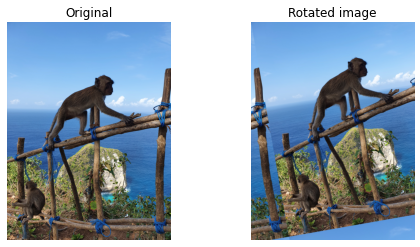

In [17]:
#Exercise 1 & 2 & 3

path = "data/"
im_org = io.imread(path + "NusaPenida.png")

# angle in degrees - counter clockwise
rotation_angle = 10

rot_center = [0, 0]

rotated_img = rotate(im_org, rotation_angle, center=rot_center, mode="wrap")
show_comparison(im_org, rotated_img, "Rotated image")


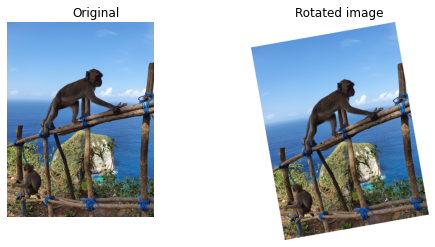

In [25]:
#Exercise 4

rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")



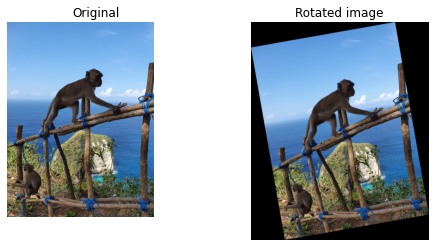

In [26]:
#Exercise 5

rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, "Rotated image")


**Euclidean image transformation**

In [53]:
#Exercise 6

# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


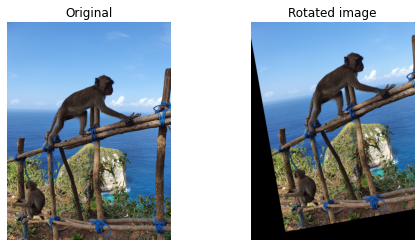

In [54]:
#Exercise 7

transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")

**Inverse transformation**

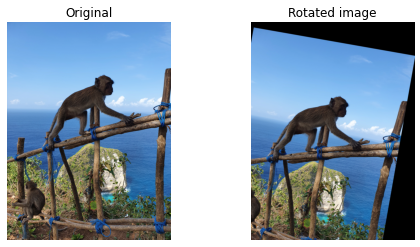

In [50]:
#Exercise 8

transformed_img = warp(im_org, tform.inverse)
show_comparison(im_org, transformed_img, "Rotated image")


**Similarity transform of image**

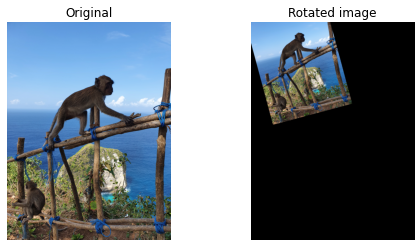

In [103]:
#Exercise 9

rotation_angle = 15.0 * math.pi / 180.

matrix = SimilarityTransform(scale=2, rotation=rotation_angle, translation=(40, 30))

img_transformed9 = warp(im_org, matrix)

show_comparison(im_org, img_transformed9, "Rotated image")


**The swirl image transformation**

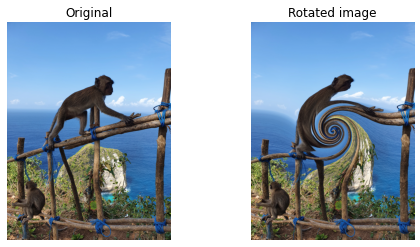

In [95]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)

show_comparison(im_org, swirl_img, "Rotated image")


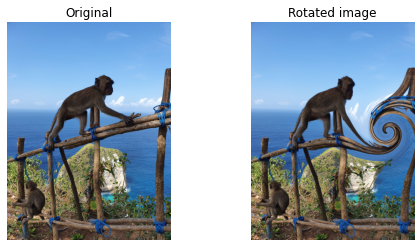

In [96]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)

show_comparison(im_org, swirl_img, "Rotated image")

**Landmark based registration**

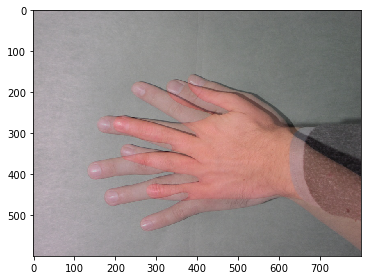

In [100]:
from skimage import img_as_float 

src_img = io.imread(path + "Hand1.jpg")
dst_img = io.imread(path + "Hand2.jpg")

blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()


**Manual landmark annotation**

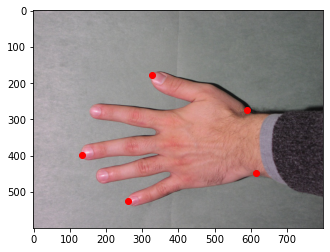

In [101]:
import numpy as np

src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

In [126]:
dst = np.array([[621, 293], [382, 166], [198, 266], [270, 440], [600, 450]])


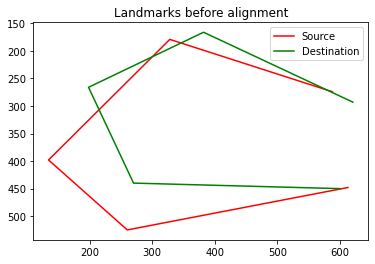

In [110]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [111]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 33553


In [133]:
from skimage.transform import matrix_transform

tform = EuclideanTransform()
tform.estimate(src, dst)

src_transform = matrix_transform(src, tform.params)

print(src_transform)
print("/n")
print(src)


[[634.28260538 288.65110176]
 [408.24658289 128.86150092]
 [163.65382932 289.39618535]
 [251.9865355  444.96717564]
 [612.83044692 463.12403633]]
/n
[[588 274]
 [328 179]
 [134 398]
 [260 525]
 [613 448]]


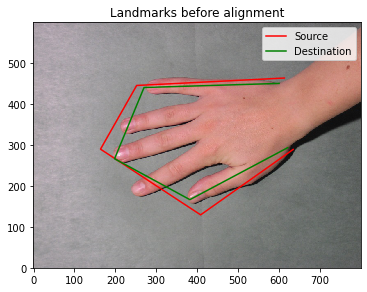

In [135]:
#Exercise 15

fig, ax = plt.subplots()
io.imshow(dst_img)
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [136]:
warped = warp(src_img, tform.inverse)

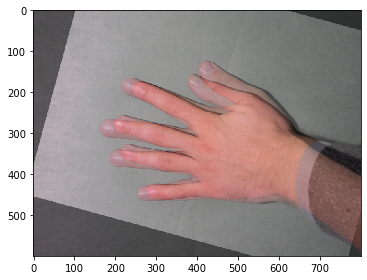

In [137]:
blend = 0.5 * img_as_float(warped) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

**Video transformations**